# scqubits example: Jaynes-Cummings model
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np

import scqubits as scq
from scqubits import HilbertSpace, InteractionTerm, ParameterSweep

## The Jaynes-Cummings model

The Jaynes-Cummings mode describes a system composed of a qubit (two-level system) coupled to a harmonic oscillator. The coupling is such that a qubit excitation can be "converted" into a photon and vice versa,

$\displaystyle H=-\frac{\omega_q}{2}\sigma_z + \omega_r a^\dagger a + g (a\sigma_+ + a^\dagger \sigma_-)$

This model can be solved exactly, resulting in the following eigenenergies:

$\displaystyle E_0 = -\frac{1}{2}\omega_q$,

$\displaystyle E_{n\pm} =  \bigg(n-\frac{1}{2}\bigg) \omega_r \pm \sqrt{\frac{\Delta^2}{4}+n g^2}$,

where $\Delta=\omega_r-\omega_q$ and $n=1,2,\ldots$.


In [3]:
# exact eigenenergies for comparing with numerics

def energies(frequency_r, frequency_q, g, n_cutoff):
    delta = frequency_r - frequency_q
    energies1 = (np.arange(1, n_cutoff) - 0.5) * frequency_r
    energies2 = np.sqrt(delta**2/4 + np.arange(1, n_cutoff) * g**2)
    energies_plus = energies1 + energies2
    energies_minus = energies1 - energies2
    energies_0 = np.asarray([[-0.5 * frequency_q]])
    all_energies = np.append(energies_0, energies_minus)
    all_energies = np.append(all_energies, energies_plus)
    return np.sort(all_energies)

### Set up the subsystems

In [4]:
frequency_q = 1.0
frequency_r = 0.8
g = 0.1


qubit = scq.GenericQubit(E=frequency_q)

osc = scq.Oscillator(
    E_osc=frequency_r,
    truncated_dim=10  # up to 9 photons
)

### Set up Hilbert space

In [5]:
# Form a list of all components making up the Hilbert space.
hilbertspace = HilbertSpace([qubit, osc])

hilbertspace.add_interaction(
    g_strength = g,
    op1 = qubit.sm_operator,
    op2 = osc.creation_operator,
    add_hc = True # whether to add hermitian conjugation
)

In [5]:
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

GenericQubit--------| [GenericQubit_1]
                    | E: 1.0
                    |
                    | dim: 2


Oscillator----------| [Oscillator_1]
                    | E_osc: 0.8
                    | l_osc: None
                    | truncated_dim: 10
                    |
                    | dim: 10



HilbertSpace:  interaction terms
--------------------------------
InteractionTerm----------| [Interaction_1]
                         | g_strength: 0.1
                         | operator_list: [(0, array([[0., 0.],
       [1., 0.]])), (1, arra ...
                         | add_hc: True




In [6]:
evals = hilbertspace.eigenvals(evals_count=5)
print(evals)

[-0.5         0.25857864  0.54142136  1.02679492  1.37320508]


In [20]:
def eigenvals_at_g(g):
    hilbertspace = HilbertSpace([qubit, osc])
    hilbertspace.add_interaction(
        g_strength = g,
        op1 = qubit.sm_operator,
        op2 = osc.creation_operator,
        add_hc = True
    )
    evals = hilbertspace.eigenvals(evals_count=5)
    return evals

glist = np.linspace(0, 0.5, 100)
evals = [eigenvals_at_g(g) for g in glist]

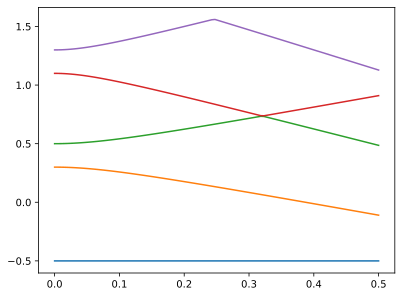

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(glist, evals)
plt.show()

In [7]:
energies(frequency_r, frequency_q, g, 3)

array([-0.5       ,  0.25857864,  0.54142136,  1.02679492,  1.37320508])